## Introduction

In [414]:
from fastai.imports import *
np.set_printoptions(linewidth=130)

## Data preprocessing

In [415]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')


df = pd.read_csv('/kaggle/input/smoker-status-prediction-using-biosignals/train_dataset.csv')
tst_df = pd.read_csv('/kaggle/input/smoker-status-prediction-using-biosignals/test_dataset.csv')

In [416]:
def proc_data(df):
    df.columns = [col.replace(' ', '_').lower() for col in df.columns]
    columns_to_log = df.columns[(df > 10).any()]
    df[columns_to_log + "_log"] = np.where(df[columns_to_log] > 10, np.log(df[columns_to_log]), df[columns_to_log])
    df.drop(columns=columns_to_log, inplace=True)
    return df

# Copiando o DataFrame original
old_df = df.copy()

# Chamando a função para modificar o DataFrame original
df = proc_data(df)
tst_df = proc_data(tst_df)

In [417]:
errors = {}
df

,eyesight(left),eyesight(right),hearing(left),hearing(right),urine_protein,dental_caries,smoking,age_log,height(cm)_log,weight(kg)_log,...,fasting_blood_sugar_log,cholesterol_log,triglyceride_log,hdl_log,ldl_log,hemoglobin_log,serum_creatinine_log,ast_log,alt_log,gtp_log
0,0.9,0.9,1,1,1,1,1,3.555348,5.135798,4.442651,...,4.574711,5.476464,5.030438,4.248495,4.955827,2.985682,1.0,4.110874,4.744932,4.828314
1,0.7,0.9,1,1,1,1,0,2.995732,5.164786,4.700480,...,4.477337,5.351858,4.852030,4.262680,4.736198,2.766319,1.1,2.944439,3.218876,3.401197
2,0.9,0.9,1,1,3,0,0,3.806662,5.043425,4.174387,...,4.382027,5.262690,4.787492,4.043051,4.718499,2.617396,0.6,6.993933,7.244228,5.620401
3,0.8,0.7,1,1,1,0,0,3.806662,5.105945,4.382027,...,5.517453,5.347108,5.902633,3.828641,4.510860,2.827314,0.9,3.465736,3.583519,3.583519
4,1.5,0.1,1,1,1,0,0,2.995732,5.105945,4.094345,...,4.605170,5.187386,5.298317,3.850148,4.521789,2.701361,1.2,3.258097,3.332205,2.708050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38979,0.4,0.6,1,1,1,1,0,3.688879,5.105945,4.094345,...,4.532599,4.969813,3.970292,4.110874,4.276666,2.509599,0.5,2.890372,2.890372,3.044522
38980,1.5,1.2,1,1,2,0,0,3.806662,5.043425,4.007333,...,4.510860,5.424950,4.605170,4.330733,4.875197,2.525729,0.6,3.135494,2.397895,2.484907
38981,0.6,0.5,1,1,1,1,1,3.688879,5.135798,4.653960,...,4.744932,5.416100,5.278115,3.871201,4.927254,2.839078,0.8,3.178054,3.135494,3.555348
38982,1.5,1.5,1,1,1,0,1,3.688879,5.075174,4.007333,...,4.624973,5.327876,3.871201,4.369448,4.753590,2.484907,0.6,3.178054,2.995732,2.833213


Aqui estão as traduções para os parâmetros mencionados:

* 'eyesight(left)': Visão (olho esquerdo)
* 'eyesight(right)': Visão (olho direito)
* 'hearing(left)': Audição (ouvido esquerdo)
* 'hearing(right)': Audição (ouvido direito)
* 'Urine protein': Proteína na urina
* 'dental caries': Cáries dentárias
* 'smoking': Fumante
* 'age_log': Logaritmo da idade
* 'height(cm)_log': Logaritmo da altura (em centímetros)
* 'weight(kg)_log': Logaritmo do peso (em quilogramas)
* 'waist(cm)_log': Logaritmo da circunferência da cintura (em centímetros)
* 'systolic_log': Logaritmo da pressão arterial sistólica
* 'relaxation_log': Logaritmo da pressão arterial diastólica
* 'fasting blood sugar_log': Logaritmo da glicose em jejum
* 'Cholesterol_log': Logaritmo do colesterol total
* 'triglyceride_log': Logaritmo dos triglicerídeos
* 'HDL_log': Logaritmo do colesterol HDL
* 'LDL_log': Logaritmo do colesterol LDL
* 'hemoglobin_log': Logaritmo da hemoglobina
* 'serum creatinine_log': Logaritmo da creatinina sérica
* 'AST_log': Logaritmo da enzima AST
* 'ALT_log': Logaritmo da enzima ALT
* 'Gtp_log': Logaritmo da enzima GTP (ou GTT)

In [418]:
dep="smoking"

## Binary splits

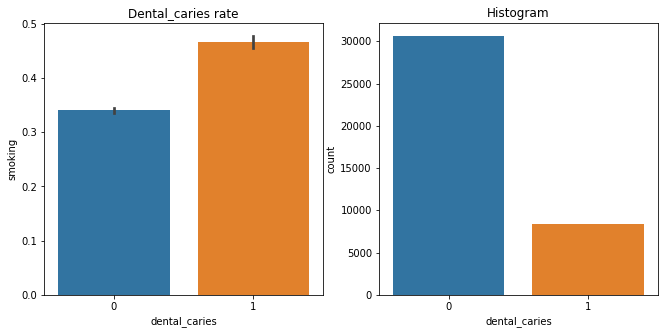

In [419]:
import seaborn as sns

fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=df, y=dep, x="dental_caries", ax=axs[0]).set(title="Dental_caries rate")
sns.countplot(data=df, x="dental_caries", ax=axs[1]).set(title="Histogram");

In [420]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(df, test_size=0.25)

In [421]:
def xs_y(df, dep):
    xs = df.drop("smoking", axis=1).copy()  # Remove a coluna "smoking"
    return xs, df[dep] if dep in df else None

trn_xs, trn_y = xs_y(trn_df, dep)
val_xs, val_y = xs_y(val_df, dep)

modelo onde todos que tem carie, são fumantes

In [422]:
preds = val_xs.dental_caries==1

In [423]:
preds

22014    False
8979      True
9517     False
9003     False
33220    False
         ...  
14612    False
3469      True
10798     True
22539     True
3706      True
Name: dental_caries, Length: 9746, dtype: bool

We'll use mean absolute error to measure how good this model is:

In [424]:
from sklearn.metrics import mean_absolute_error
absolute_error = mean_absolute_error(val_y, preds)
errors.update({"dental_caries_model":absolute_error})
absolute_error

0.3793351118407552

In [425]:
df['waist(cm)_log']

0        4.574711
1        4.700480
2        4.454347
3        4.543295
4        4.394449
           ...   
38979    4.382027
38980    4.317488
38981    4.820282
38982    4.317488
38983    4.395683
Name: waist(cm)_log, Length: 38984, dtype: float64

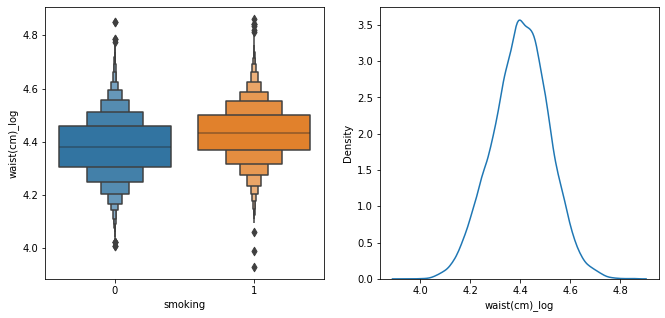

In [426]:
df_creatine = trn_df[trn_df['waist(cm)_log']>0]
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.boxenplot(data=df_creatine, x=dep, y="waist(cm)_log", ax=axs[0])
sns.kdeplot(data=df_creatine, x="waist(cm)_log", ax=axs[1]);

In [427]:
preds = val_xs['waist(cm)_log']>4.43

In [428]:
errors.update({"waist(cm)_log>4.43":mean_absolute_error(val_y, preds)})

In [429]:
def _side_score(side, y):
    tot = side.sum()
    if tot<=1: return 0
    return y[side].std()*tot

In [430]:
def score(col, y, split):
    lhs = col<=split
    return (_side_score(lhs,y) + _side_score(~lhs,y))/len(y)

In [431]:
score(trn_xs["dental_caries"], trn_y, 0.5)

0.4793934469075377

In [432]:
nm = "age_log"
col = trn_xs[nm]
unq = col.unique()
unq.sort()
unq

array([2.99573227, 3.21887582, 3.40119738, 3.55534806, 3.68887945, 3.80666249, 3.91202301, 4.00733319, 4.09434456, 4.17438727,
       4.24849524, 4.31748811, 4.38202663, 4.44265126])

In [433]:
scores = np.array([score(col, trn_y, o) for o in unq if not np.isnan(o)])
unq[scores.argmin()]

3.5553480614894135

In [434]:
def min_col(df, nm):
    col,y = df[nm],df[dep]
    unq = col.dropna().unique()
    scores = np.array([score(col, y, o) for o in unq if not np.isnan(o)])
    idx = scores.argmin()
    return unq[idx],scores[idx]

In [435]:
cols = df.columns.difference(['smoking'])
{o:min_col(trn_df, o) for o in cols}

{'age_log': (3.5553480614894135, 0.47601659328698714),
 'alt_log': (3.044522437723423, 0.47740780562332413),
 'ast_log': (3.1354942159291497, 0.4802274571046587),
 'cholesterol_log': (5.049856007249537, 0.48189401578165825),
 'dental_caries': (0, 0.4793934469075377),
 'eyesight(left)': (0.9, 0.4804808398383178),
 'eyesight(right)': (0.8, 0.4798831654551002),
 'fasting_blood_sugar_log': (4.605170185988092, 0.48013342762109606),
 'gtp_log': (3.1354942159291497, 0.46018418586812776),
 'hdl_log': (3.970291913552122, 0.47426478549417944),
 'hearing(left)': (1, 0.48204718763574333),
 'hearing(right)': (1, 0.48209327502081),
 'height(cm)_log': (5.075173815233827, 0.43353413736129315),
 'hemoglobin_log': (2.631888840136646, 0.4388578157357665),
 'ldl_log': (4.2626798770413155, 0.4812686332802518),
 'relaxation_log': (4.23410650459726, 0.4792678220673881),
 'serum_creatinine_log': (0.7, 0.4627730365115033),
 'systolic_log': (4.6913478822291435, 0.47987997317084957),
 'triglyceride_log': (4.7273

## Creating a decision tree

In [436]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_leaf_nodes=5).fit(trn_xs, trn_y);

One handy feature or this class is that it provides a function for drawing a tree representing the rules:

In [437]:
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

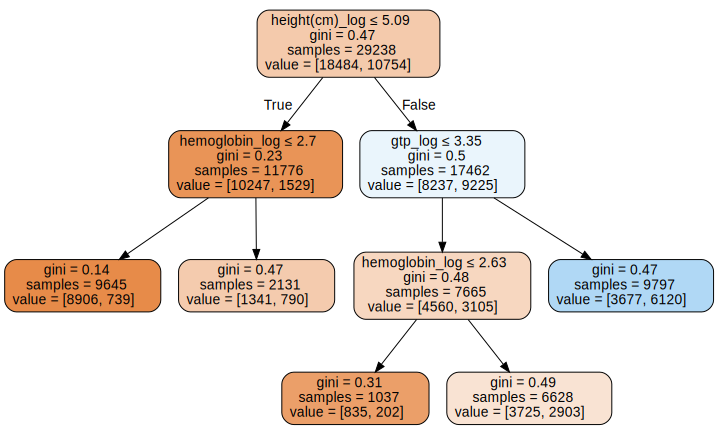

In [438]:
draw_tree(m, trn_xs, size=10)

In [439]:
def gini(cond):
    act = df.loc[cond, dep]
    return 1 - act.mean()**2 - (1-act).mean()**2

In [440]:
error = mean_absolute_error(val_y, m.predict(val_xs))
errors.update({"decision_tree_simple":error})
error

0.28586086599630617

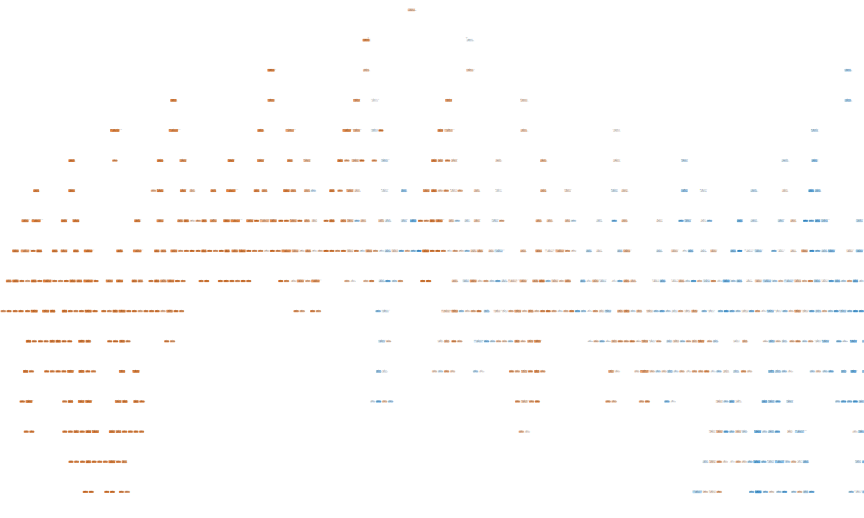

In [441]:
m = DecisionTreeClassifier(min_samples_leaf=50)
m.fit(trn_xs, trn_y)
draw_tree(m, trn_xs, size=12)

In [442]:
error = mean_absolute_error(val_y, m.predict(val_xs))
errors.update({"decision_tree_50_leafs":error})
error

0.2764210958341884

## The random forest

In [443]:
def get_tree(prop=0.75):
    n = len(trn_y)
    idxs = random.choice(n, int(n*prop))
    return DecisionTreeClassifier(min_samples_leaf=5).fit(trn_xs.iloc[idxs], trn_y.iloc[idxs])

In [444]:
trees = [get_tree() for t in range(100)]

This is nearly identical to what `sklearn`'s `RandomForestClassifier` does. The main extra piece in a "real" random forest is that as well as choosing a random sample of data for each tree, it also picks a random subset of columns for each split. Here's how we repeat the above process with a random forest:

In [445]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
error = mean_absolute_error(val_y, rf.predict(val_xs))
errors.update({"RandomForestClassifier-100-5":error})
error

0.2110609480812641

In [446]:
rf = RandomForestClassifier(200, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
error = mean_absolute_error(val_y, rf.predict(val_xs))
errors.update({"RandomForestClassifier-200-5":error})
error

0.21249743484506464

In [447]:
rf = RandomForestClassifier(100, min_samples_leaf=1)
rf.fit(trn_xs, trn_y);
error = mean_absolute_error(val_y, rf.predict(val_xs))
errors.update({"RandomForestClassifier-200-5":error})
error

0.20162117791914633

In [448]:
rf = RandomForestClassifier(200, min_samples_leaf=1)
rf.fit(trn_xs, trn_y);
error = mean_absolute_error(val_y, rf.predict(val_xs))
errors.update({"RandomForestClassifier-200-1":error})
error

0.20223681510363226

In [449]:
rf = RandomForestClassifier(100, min_samples_leaf=10)
rf.fit(trn_xs, trn_y);
error = mean_absolute_error(val_y, rf.predict(val_xs))
errors.update({"RandomForestClassifier-100-10":error})
error

0.22665709008824134

In [450]:
rf = RandomForestClassifier(200, min_samples_leaf=10)
rf.fit(trn_xs, trn_y);
error = mean_absolute_error(val_y, rf.predict(val_xs))
errors.update({"RandomForestClassifier-200-10":error})
error

0.2270675148778986

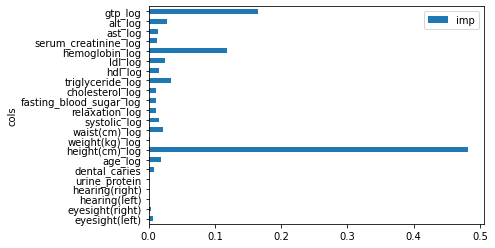

In [451]:
pd.DataFrame(dict(cols=trn_xs.columns, imp=m.feature_importances_)).plot('cols', 'imp', 'barh');

## Conclusion

In [452]:
errors

{'dental_caries_model': 0.3793351118407552,
 'waist(cm)_log>4.43': 0.3872357890416581,
 'decision_tree_simple': 0.28586086599630617,
 'decision_tree_50_leafs': 0.2764210958341884,
 'RandomForestClassifier-100-5': 0.2110609480812641,
 'RandomForestClassifier-200-5': 0.20162117791914633,
 'RandomForestClassifier-200-1': 0.20223681510363226,
 'RandomForestClassifier-100-10': 0.22665709008824134,
 'RandomForestClassifier-200-10': 0.2270675148778986}

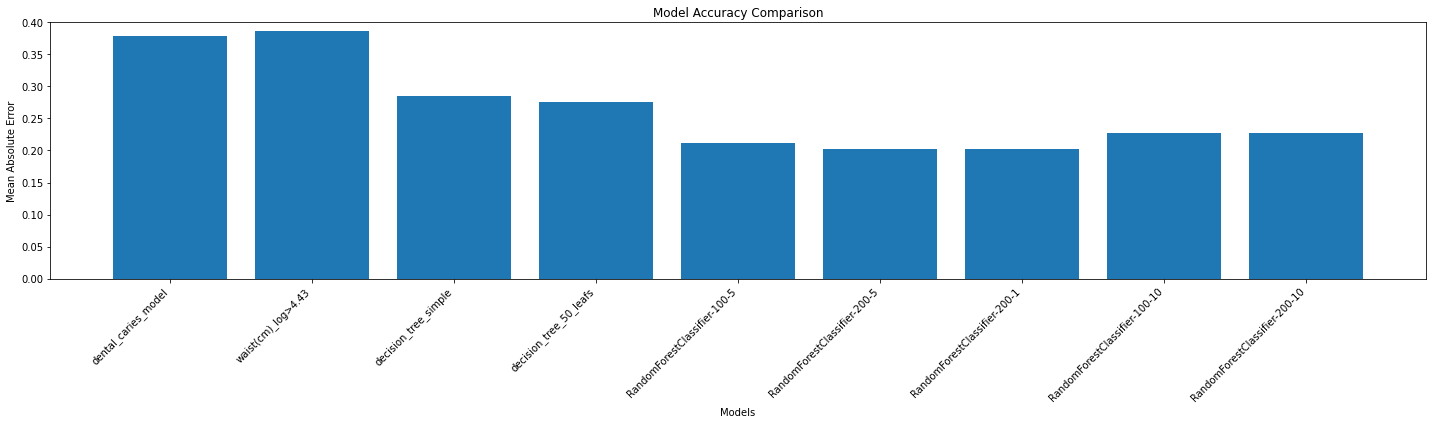

In [453]:
import matplotlib.pyplot as plt


# Your dictionary
# Extract keys and values
labels = list(errors.keys())
values = list(errors.values())

# Plotting with rotated labels
plt.figure(figsize=(20, 6))
plt.bar(labels, values)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Model Accuracy Comparison')

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed

plt.ylim(0, 0.4)  # Adjust the y-axis limit if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [454]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)